In [1]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [2]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [3]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [5]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [6]:
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

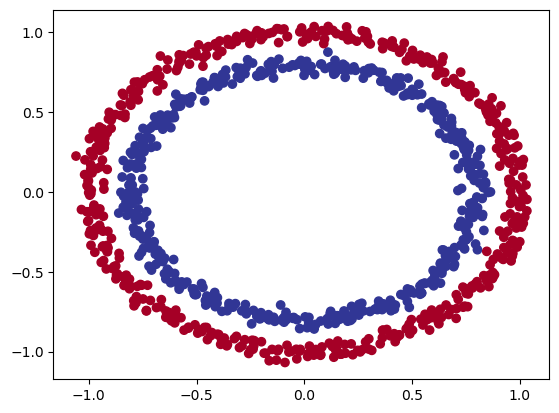

In [7]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [8]:
X.shape, y.shape

((1000, 2), (1000,))

In [9]:
len(X), len(y)

(1000, 1000)

In [10]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [11]:
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_1.fit(X,y,epochs=5)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - accuracy: 0.4617 - loss: 4.2654
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5115 - loss: 0.8183 
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - accuracy: 0.5071 - loss: 0.7165
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - accuracy: 0.5096 - loss: 0.6994
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step - accuracy: 0.5074 - loss: 0.6950


In [12]:
model_1.fit(X,y,epochs=200,verbose=0)
model_1.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - accuracy: 0.4852 - loss: 0.6927


[0.6932879686355591, 0.4729999899864197]

In [13]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

model_2.fit(X,y,epochs=100,verbose=0)

In [14]:
model_2.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - accuracy: 0.4830 - loss: 0.6932


[0.6933985948562622, 0.47699999809265137]

#Improving on accuracy

In [15]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_3.fit(X,y,epochs=100,verbose=0)

In [16]:
model_3.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - accuracy: 0.5037 - loss: 0.6916


[0.6951669454574585, 0.48500001430511475]

In [17]:
import numpy as np

def plot_decision_boundary(model, X, y):

  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step
doing binary classifcation...


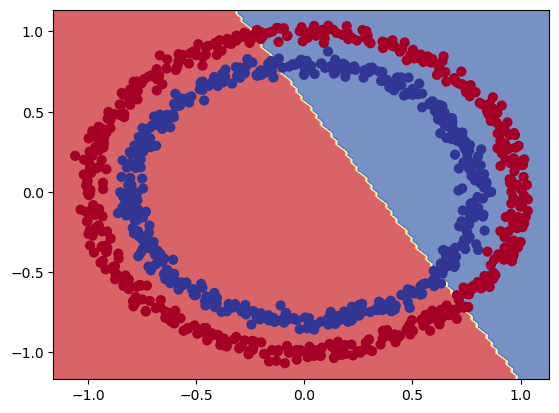

In [18]:
plot_decision_boundary(model_3, X, y)

In [19]:
tf.random.set_seed(42)
X_regression = np.arange(0,1000,5)
y_regression = np.arange(100,1100,5)
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100)

Epoch 1/100


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_3" is incompatible with the layer: expected axis -1 of input shape to have value 2, but received input with shape (None, 1)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 1), dtype=int64)
  • training=True
  • mask=None

In [20]:
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 100)            │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,965 (15.49 KB)

 Trainable params: 1,321 (5.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,644 (10.33 KB)

In [21]:
tf.random.set_seed(42) 
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 410.2753 - mae: 410.2753  
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 249.2270 - mae: 249.2270 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 90.0351 - mae: 90.0351  
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 79.9683 - mae: 79.9683
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 92.2564 - mae: 92.2564  
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 52.5559 - mae: 52.5559
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 53.2081 - mae: 53.2081
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 40.8387 - mae: 40.8387
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 48.2353 - mae: 48.2353
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 41.8521 - mae: 41.8521
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 42.4591 - mae: 42.4591
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 40.0139 - mae: 40.0139
Epoch 13/100
5/5 ━━━━━━━━━

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


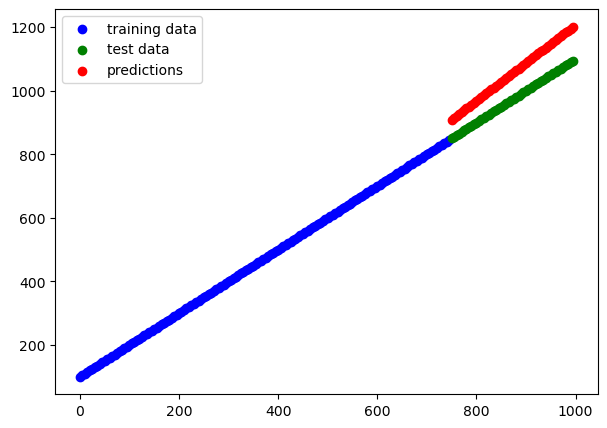

In [22]:
y_reg_preds = model_3.predict(X_reg_test)

plt.figure(figsize=(7,5))
plt.scatter(X_reg_train,y_reg_train,c='b',label='training data'),
plt.scatter(X_reg_test,y_reg_test,c='g',label='test data'),
plt.scatter(X_reg_test,y_reg_preds.squeeze(),c='r',label='predictions')
plt.legend()

In [23]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation='linear'),
    tf.keras.layers.Dense(1)
])

model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

history = model_4.fit(X,y,epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - accuracy: 0.4830 - loss: 4.9007 
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - accuracy: 0.4830 - loss: 4.5651
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - accuracy: 0.4830 - loss: 4.2979
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - accuracy: 0.4830 - loss: 4.1180
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - accuracy: 0.4830 - loss: 3.7635
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step - accuracy: 0.4830 - loss: 3.4523
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - accuracy: 0.4830 - loss: 3.2509
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - accuracy: 0.4830 - loss: 2.8552
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - accuracy: 0.4830 - loss: 2.3522
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - accuracy: 0.4830 - loss: 1.2900
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - accuracy: 0.4830 - loss: 1.1132
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step
doing binary classifcation...


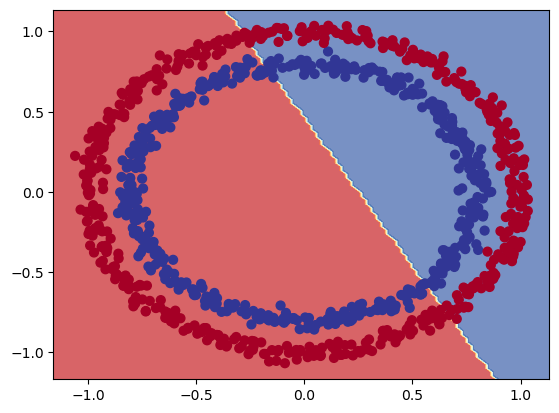

In [24]:
plot_decision_boundary(model_4,X,y)

In [25]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation='relu'),
    tf.keras.layers.Dense(1)
])

model_5.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

history = model_5.fit(X,y,epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - accuracy: 0.4830 - loss: 8.3336
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - accuracy: 0.4830 - loss: 8.3336
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - accuracy: 0.4830 - loss: 8.3336
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step - accuracy: 0.4830 - loss: 8.3336
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - accuracy: 0.4830 - loss: 8.3336
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - accuracy: 0.4830 - loss: 8.3336
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - accuracy: 0.4830 - loss: 8.3336
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - accuracy: 0.4830 - loss: 8.3336
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4830 - loss: 8.3336
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - accuracy: 0.4830 - loss: 8.3336
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - accuracy: 0.4830 - loss: 8.3336
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [26]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step - accuracy: 0.4830 - loss: 6.5597 
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - accuracy: 0.4830 - loss: 5.5400
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - accuracy: 0.4751 - loss: 2.4294
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - accuracy: 0.4566 - loss: 1.0593
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - accuracy: 0.4664 - loss: 0.9789
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - accuracy: 0.4780 - loss: 0.9347
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - accuracy: 0.4881 - loss: 0.9014
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - accuracy: 0.4882 - loss: 0.8741
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4856 - loss: 0.8495 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - accuracy: 0.4837 - loss: 0.8280
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - accuracy: 0.4857 - loss: 0.8111
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0

In [27]:
model_6.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - accuracy: 0.6291 - loss: 0.6397


[0.6469916105270386, 0.6159999966621399]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 272us/step
doing binary classifcation...


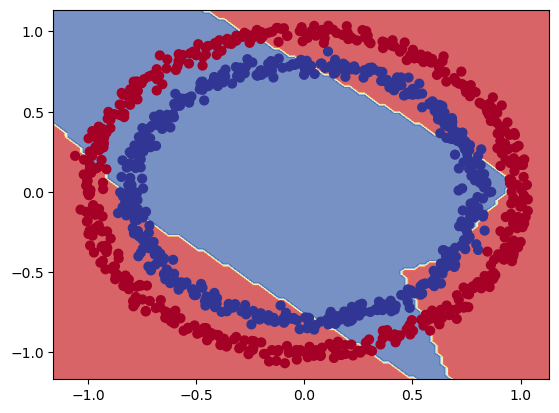

In [28]:
plot_decision_boundary(model_6, X, y)

In [29]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
])

model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history = model_7.fit(X,y,epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step - accuracy: 0.4828 - loss: 0.6964 
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - accuracy: 0.5036 - loss: 0.6946
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - accuracy: 0.5124 - loss: 0.6935
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - accuracy: 0.5071 - loss: 0.6925
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - accuracy: 0.5115 - loss: 0.6916
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5067 - loss: 0.6908 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step - accuracy: 0.5120 - loss: 0.6900
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - accuracy: 0.5127 - loss: 0.6892
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - accuracy: 0.5109 - loss: 0.6885
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - accuracy: 0.5098 - loss: 0.6877
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - accuracy: 0.5168 - loss: 0.6870
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0

In [30]:
model_7.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - accuracy: 0.9655 - loss: 0.2445


[0.2410745769739151, 0.9620000123977661]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step
doing binary classifcation...


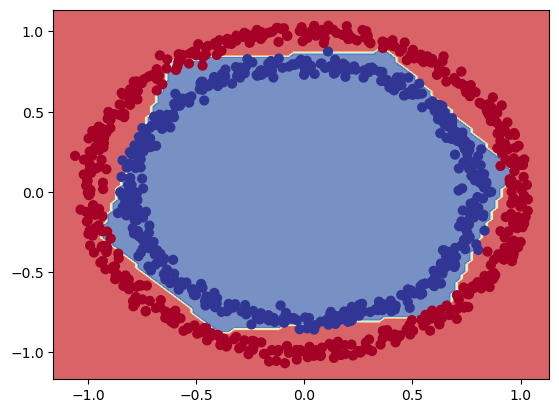

In [31]:
plot_decision_boundary(model_7,X,y)

In [32]:
A = tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [33]:
def sigmoid(x):
    return 1/(1+tf.exp(-x))

sigmoid(A)


<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535017e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

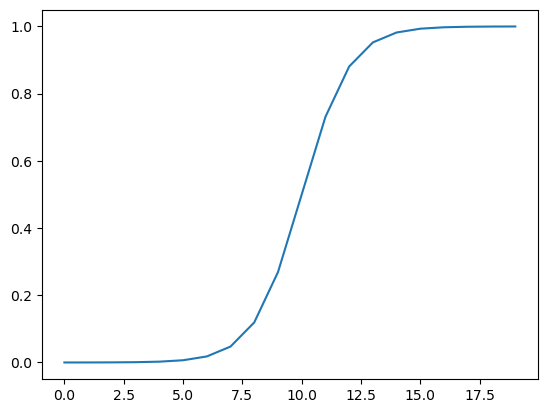

In [34]:
plt.plot(sigmoid(A))

In [35]:
def relu(x):
    return tf.maximum(0,x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

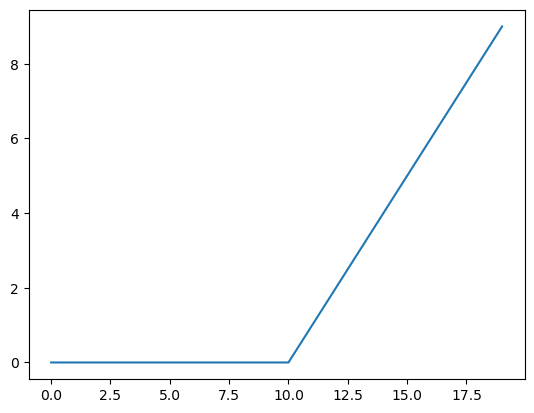

In [36]:
plt.plot(relu(A))

In [37]:
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [38]:
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

In [39]:
len(X)

1000

In [41]:
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape

((800, 2), (200, 2))

In [50]:
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

history = model_8.fit(X_train,y_train,epochs=25, verbose=False)

In [51]:
loss, accuracy = model_8.evaluate(X_test, y_test)
print(f'Loss of model is {loss}')
print(f'Accuracy of model is {accuracy*100:.2f}%')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9931 - loss: 0.0884 
Loss of model is 0.08777239918708801
Accuracy of model is 99.00%


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step
doing binary classifcation...
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 207us/step
doing binary classifcation...


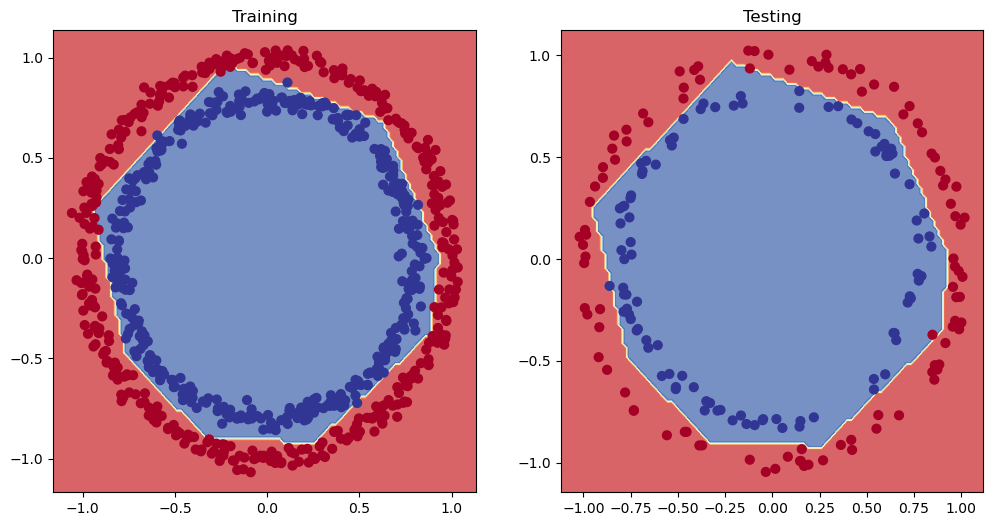

In [52]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Training')
plot_decision_boundary(model_8,X_train,y_train)
plt.subplot(1,2,2)
plt.title('Testing')
plot_decision_boundary(model_8,X_test,y_test)
plt.show()

Text(0.5, 1.0, 'Model 8 loss and accuracy')

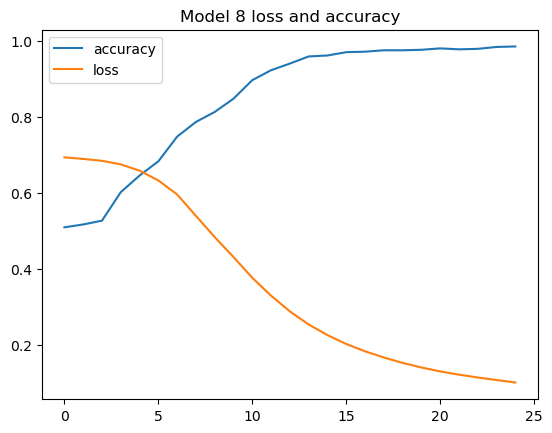

In [53]:
pd.DataFrame(history.history).plot()
plt.title('Model 8 loss and accuracy')

In [54]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_9.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4*10**(epoch/20))

history = model_9.fit(X_train,
                      y_train,
                      epochs=100,
                      callbacks=[lr_scheduler])

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - accuracy: 0.5025 - loss: 0.7016 - learning_rate: 1.0000e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - accuracy: 0.5027 - loss: 0.7012 - learning_rate: 1.1220e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5052 - loss: 0.7009 - learning_rate: 1.2589e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5072 - loss: 0.7004 - learning_rate: 1.4125e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5065 - loss: 0.7000 - learning_rate: 1.5849e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - accuracy: 0.5060 - loss: 0.6995 - learning_rate: 1.7783e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5060 - loss: 0.6991 - learning_rate: 1.9953e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - accuracy: 0.5047 - loss: 0.6985 - learning_rate: 2.2387e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step - accuracy: 0.5007 - loss: 0.6980 -

<Axes: xlabel='epochs'>

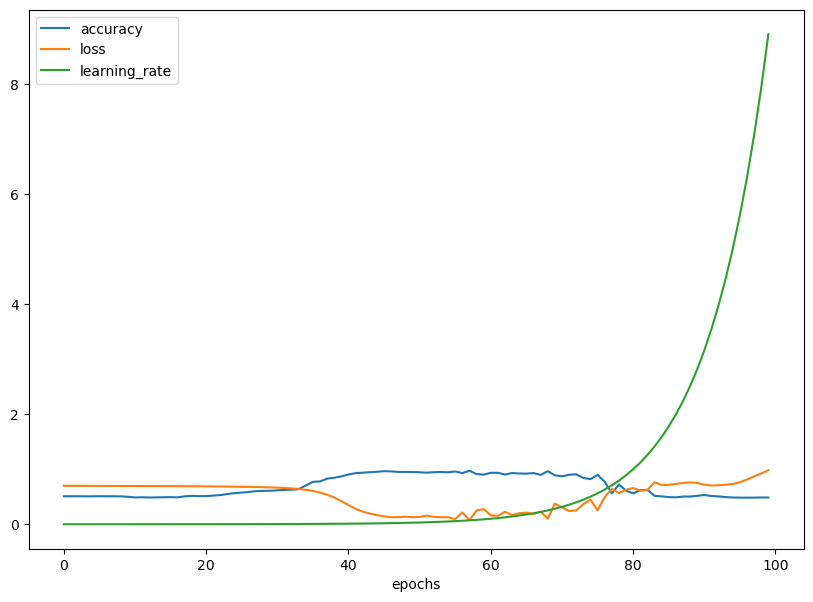

In [57]:
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel='epochs')

Text(0.5, 1.0, 'Learning rate vs loss')

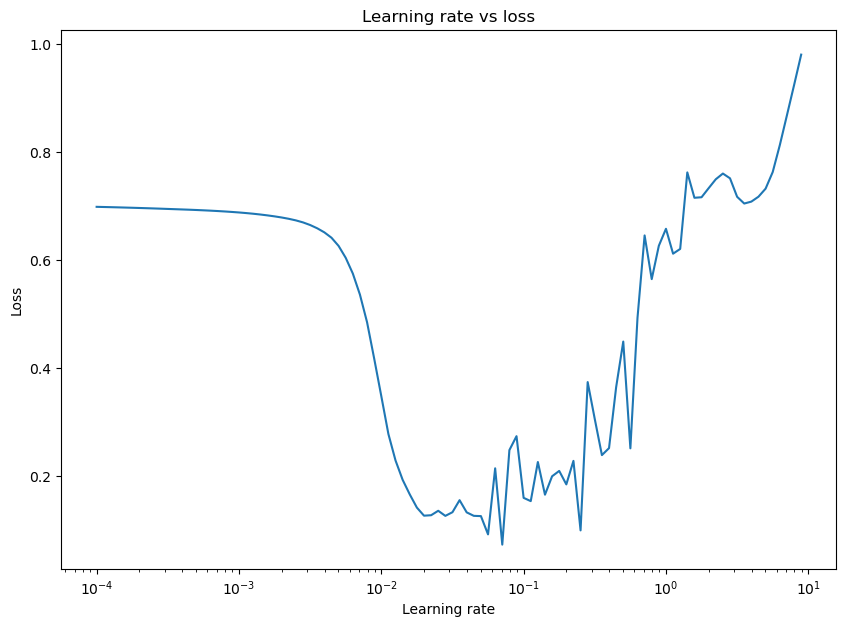

In [58]:
lrs = 1e-4*(10**(tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Learning rate vs loss')

In [59]:
#taking learning rate as 0.02
tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_10.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics=['accuracy'])

history = model_10.fit(X_train,y_train,epochs=20)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - accuracy: 0.4577 - loss: 0.7127 
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - accuracy: 0.5137 - loss: 0.6897
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step - accuracy: 0.5669 - loss: 0.6790
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - accuracy: 0.5987 - loss: 0.6565
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - accuracy: 0.6561 - loss: 0.6264
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step - accuracy: 0.7185 - loss: 0.5816
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - accuracy: 0.7683 - loss: 0.5193
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - accuracy: 0.8176 - loss: 0.4457
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step - accuracy: 0.8955 - loss: 0.3407
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step - accuracy: 0.9675 - loss: 0.2368
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - accuracy: 0.9893 - loss: 0.1738
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

In [60]:
model_10.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0364 


[0.03866013139486313, 1.0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step
doing binary classifcation...
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 204us/step
doing binary classifcation...


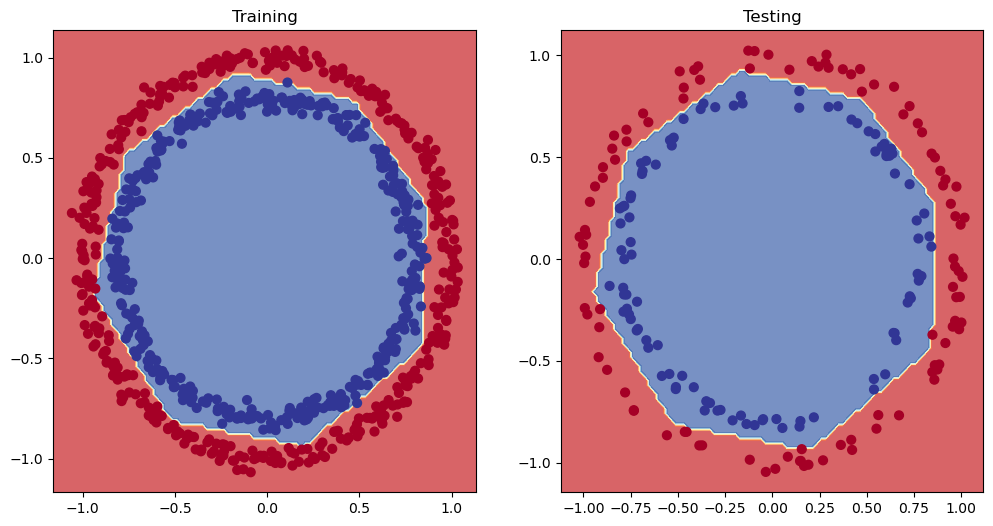

In [61]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Training')
plot_decision_boundary(model_10,X_train,y_train)
plt.subplot(1,2,2)
plt.title('Testing')
plot_decision_boundary(model_10,X_test,y_test)  
plt.show()

In [62]:
from sklearn.metrics import confusion_matrix
y_preds = model_10.predict(X_test)
confusion_matrix(y_test,tf.round(y_preds))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


array([[101,   0],
       [  0,  99]])